In [1]:
# Cargar Celda
from typing import List, Callable, Tuple, Any
%matplotlib inline 
#para poder mostrar figuras integradas en el notebook
# figuras como las de los grafos

In [2]:
# Cargar Celda

class Node:
    def __init__(self, id: Any, parent: "Node", g: int, f: int):
        self.id = id
        self.parent = parent
        self.g = g
        self.f = f

    def get_parent(self) -> 'Node':
        """Nodo desde el que se alcanza al nodo actual.

        Returns:
            Nodo: nodo padre
        """
        return self.parent

    def get_id(self) -> Any:
        """El valor del nodo actual

        Returns:
            str: Una letra
        """
        return self.id


    def get_g(self) -> int:
        """G es el coste desde el nodo inicial hasta el Nodo Actual

        Returns:
            int: [description]
        """
        return self.g


    def get_f(self) -> int:
        """ F es el coste total del caminio desde el nodo inicial hasta al nodo final.
        F = G + H
        donde H es la heurística (en este NB es la diferencia entre g y f)

        Returns:
            int: La nota de ARPA, un valor comprendido entre 0 y 4
        """
        return self.f


    def get_path(self) -> List["Node"]:

        current_node = self
        path: List[Node] = []

        while current_node:
            path.append(current_node)
            current_node = current_node.get_parent()

        path.reverse()
        return path

    def print_parent(self):
        parent = self.get_parent()
        if parent:
            return f"p:{self.get_parent().get_id()}"
        return "p:\\"
    def __repr__(self) -> str:
         return f"{self.id} f:{self.f} g:{self.g} p:{self.print_parent()}|"
         #return f"{self.id} f:{self.f}"
         #return f"{self.get_id()}"
    def __str__(self) -> str:
        return self.__repr__()

    def __lt__(self, other):
        return self.f<other.f

    def __eq__(self, other: "Node") -> bool:
	    return self.id.__eq__(other.get_id())


In [3]:
# Cargar Celda
from queue import PriorityQueue

class Open(PriorityQueue):
    """
    Priority Queue of Nodes, it stores Tuples.
    Tuple[priority: int, node: Node]
    """
    def pop(self) -> Node:
        return self.get()[1]

    def put_node(self, node : Node) -> None:
        self.put((node.get_f(), node))

    def extend(self, nodes: List[Node]) -> None:
        for node in nodes:
            self.put_node(node)

    def get_node(self, node_id: str) -> Node:
        for node in self.queue:
            if node[1].get_id() == node_id:  return node[1]

    def update(self, old: Node, new: Node):
        self.queue.remove((old.get_f(), old))
        self.put_node(new)

    def get_all_nodes(self) -> List[Node]:
        return list(map(lambda x: x[1], self.queue))

    def get_all_ids(self) -> List[str]:
        return list(map(lambda x: x[1].get_id(), self.queue))

    def contains_id(self, node: Node) -> bool:
        return node.get_id() in self.get_all_ids()

    def __str__(self):
        return self.get_all_nodes().__str__()

# Implementación de A*

En este notebook se realizará la implementación del algoritmo A\* que funcionará primeramente sobre un grafo y posteriormente sobre un mapa 2D (un tablero).
La implementación de A\* trabajará con nodos, así que será trivial adaptar el algoritmo para que realice búsquedas en otro tipo de problemas.
Para realizar dicha adaptación solo será necesario implementar nuevas funciones de sucesores, meta y heurístico. 
De hecho, la práctica utilizará el código de este notebook, razón por la que existen ciertas celdas que comienzan por # Cargar Celda


```Python 

def AStar(inicial, sucesoresF, metaF, heuristicoF):
    '''
    Algoritmo A*. 
    Recibe:
    inicial: Nodo inicial
    sucesoresF: Función que toma un nodo y devuelve una lista de nodos sucesores (dependerá de cada problema).
    metaF: Función que toma un estado y devuelve True si es un estado meta (dependerá de cada problema)
    heuristicoF: Función que toma un estado y devuelve un valor númerico con la estimación del coste restante para llegar a una meta (dependerá de cada problema)
    
    Return: solución [estado1, estado2,..., estadoN] o [] si no hay solución
    '''
    
    '''
    creo abiertos y cerrados.
    abiertos se inicializa con el nodo inicial.
    cerrados estará vacía
    
    mientras abiertos no esté vacía:
        recupero de abiertos el nodo con menor f (nodoActual).
        guardo nodoActual en cerrados.
        compruebo si es meta:
            si lo es devuelve el camino
        obtengo los sucesores, la función genera sucesores recibe a la que calcula la h
        para suc en sucesores:
            si no está en abiertos ni en cerrados 
                lo meto en abiertos
            está en abiertos pero suc tiene menor f
                lo actualizo en abiertos
            esta en cerrados pero suc tiene menor f
                lo elimino de cerrados y lo meto en abiertos
    devuelvo [], no había solución
    '''
        
```

In [4]:
# Cargar Celda
debugData = []
def AStar(start_node: Node,
          get_descendants : Callable[[Node, Callable[[Node], int]], List[Node]],
          is_meta: Callable[[Node], bool],
          get_heuristic: Callable[[Any], int]
          ) -> List[Node]:

    open_queue = Open()
    open_queue.put_node(start_node)
    close_queue: List[Node] = []
    while not open_queue.empty():
        debug = []
        debug.append(open_queue.__str__())
        node: Node = open_queue.pop()
        debug.append(node)
        close_queue.append(node)


        if is_meta(node): return node.get_path()

        descendants = get_descendants(node, get_heuristic)
        debug.append(descendants.__str__())
        debug.append(close_queue.__str__())
        debugData.append(debug)
        for descendant in descendants:

            if not open_queue.contains_id(descendant) and not descendant in close_queue:
                open_queue.put_node(descendant)
            elif open_queue.contains_id(descendant):
                old_node = open_queue.get_node(descendant.get_id())
                if old_node.get_f() > descendant.get_f():
                    open_queue.update(old_node, descendant)
            else:
                for old_node in close_queue:
                    if (old_node.get_id() == descendant.get_id()
                        and old_node.get_f() > descendant.get_f()):
                        close_queue.remove(old_node)
                        open_queue.put_node(descendant)
    return []


# El grafo de búsqueda

Para probar el algoritmo de A\* en un problema sencillo y con solución y traza conocida se va a crear un grafo como el de los apuntes de teoría usando la librería networkx. 

Básicamente el grafo se crea con nx.Graph(), con nx.DiGraph() le estoy diciendo que es dirigido.

Se crean nodos con add_node y se crean arcos con add_edge

los hijos del nodo 1 son:
[2, 3]


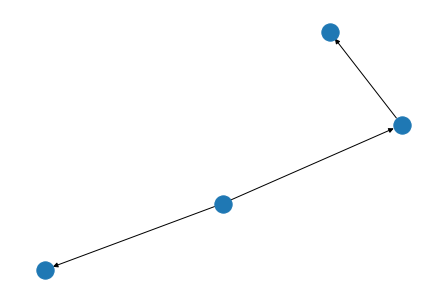

In [5]:
# ejemplo de grafo básico

import networkx as nx

# Creo el grafo
Gprueba = nx.DiGraph()

Gprueba.add_node(1)    
Gprueba.add_node(2)    
Gprueba.add_node(3)    

Gprueba.add_edge(1,2)
Gprueba.add_edge(1,3)
Gprueba.add_edge(2,4)

# consultar los hijos del nodo 1
# el grafo G funciona como un diccionario
print("los hijos del nodo 1 son:")
print(list(Gprueba[1].keys()))


nx.draw(Gprueba)

Sabiendo estos conceptos básicos de creación de grafos, se va a pasar a crear un grafo como el de los apuntes de teoría.

Grafo de las diapositivas de A*


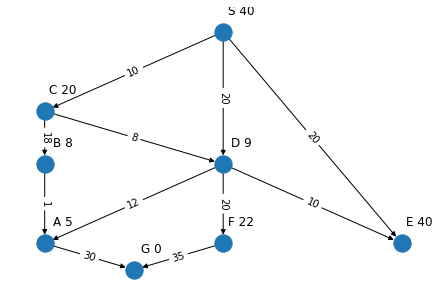

In [6]:
# Creo el grafo
Grafo = nx.DiGraph()

# este diccionario almacena los hijos que tiene cada padre
hijos = {'S': 'CDE','C': 'BD','B': 'A','D': 'AFE','A': 'G','F': 'G'}

# este diccionario almacena los costes de cada camino
costes={('S', 'C'):10, ('S', 'D'): 20, ('S', 'E'): 20, ('C', 'B'): 18,
        ('C', 'D'): 8, ('B', 'A'): 1, ('D', 'A'): 12, ('D', 'F'): 20,
        ('D', 'E'): 10, ('A', 'G'): 30, ('F', 'G'): 35}

# este diccionario almacena los valores heurísticos de cada estado.
heuristico = {'S': 40, 'C': 20, 'B': 8, 'D': 9, 'A': 5, 'F': 22, 'E': 40, 'G': 0}

# este diccionario almacena las posiciones de cada nodo, solo es estética
posiciones = {'S':(20,100),'C':(10,70),
              'B':(10,50),'D':(20,50),
              'A':(10,20),'F':(20,20),
              'E':(30,20),'G':(15,10)}

# crea el grafo, añade nodos y arcos
node_labels={}
for nodo in heuristico:
    Grafo.add_node(nodo)
    node_labels[nodo]=nodo+" "+str(heuristico[nodo])
    if nodo in hijos:
        for hijo in hijos[nodo]:
            Grafo.add_edge(nodo,hijo) 

#dibuja el grafo
nx.draw(Grafo,pos = posiciones)
#dibuja las etiquetas de los nodos y los arcos
node_label_pos = {k:[v[0]+1,v[1]+8] for k,v in posiciones.items()}
node_label_handles = nx.draw_networkx_labels(Grafo,pos = node_label_pos,labels = node_labels)
nx.draw_networkx_edge_labels(Grafo, pos = posiciones, edge_labels=costes)
print("Grafo de las diapositivas de A*")

# Funciones de sucesores, meta y heurística sobre el grafo

A continuación se pueden ver como serían las funciones de sucesores, meta y heurística para el problema de la búsqueda en el grafo.

- Para crear un nodo inicial se le pasa al constuctor de Nodo el estado inicial, su nodo padre que en el caso inicial sería None, el valor de G que es 0 y el valor de F que sería G+H, en el caso inicial como G es 0, solo haría falta H.

- sucesoresGrafo. Se obtienen los sucesores, como el grafo 'Grafo' es un diccionario solamente tenemos que consultar las claves disponibles. Se actualiza la G usando el coste necesario para llegar al hijo que se saca del diccionario de costes. Se calcula la H invocando a la función heuristicaF.

- metaGrafo. Solamente compara que el estado sea o no sea 'G' que es el valor del estado meta.
- heuristicaGrafo. Consulta en el diccionario de valores heurísticos.

In [7]:
nodoInicial = Node('S',None,0,heuristico['S'])

def sucesoresGrafo(nodo: Node, heuristicaF):
    estado = nodo.get_f()
    g = nodo.get_g()
    hijos = []

    for hijo in Grafo.succ[nodo.get_id()]:
        nuevaG = g+costes[(nodo.get_id(),hijo)]
        h=heuristicaF(hijo)
        hijos.append(Node(hijo,nodo,nuevaG,nuevaG+h))
    return hijos

def metaGrafo(nodo: Node):
    estado = nodo.get_id()
    return estado=='G' 

def heuristicaGrafo(estado):
    return heuristico[estado]                
    
print(heuristicaGrafo('S'))
print(metaGrafo(nodoInicial))
print(sucesoresGrafo(nodoInicial,heuristicaGrafo))
    


40
False
[C f:30 g:10 p:p:S|, D f:29 g:20 p:p:S|, E f:60 g:20 p:p:S|]


In [8]:
print(AStar(nodoInicial,sucesoresGrafo, metaGrafo, heuristicaGrafo))




[S f:40 g:0 p:p:\|, C f:30 g:10 p:p:S|, B f:36 g:28 p:p:C|, A f:34 g:29 p:p:B|, G f:59 g:59 p:p:A|]


# Ejemplo de path finding

En mismo código de A\* lo vamos a usar para resolver un problema de *path finding* (movernos del punto A al punto B en una matriz 2D)

### Explicación de la representación del mapa y los estados


El mapa va a ser una lista en 2D con 0s en las casillas libres y 1s en los obstaculos

Un estado van a ser coordenadas (y,x)
Una tupla (y,x).

In [9]:
# Cargar Celda
tablero = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 1, 1, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
]

estadoInicialPF = (1,1) #y,x
estadoFinalPF = (2,5)

In [10]:
# posibles movimientos 
posiblesMovs = [[1,0],[-1,0],[0,1],[0,-1]]

```Python
'''
Ejercicio 1

Hacer una función es_meta

'''

In [11]:
# Cargar Celda
def es_meta(casilla: Tuple[int,int]) -> bool:
    return casilla == estadoFinalPF

```
'''
Ejercicio 2

Hacer una función es_valido
Primero comprueba que la coordenada está dentro de los 
límites del tablero y luego que en el tablero haya un 0
en dichas coordenadas
'''
def es_valida(estado):
    global tablero
    return False
```

In [12]:
# Cargar Celda
def es_valida(casilla: Tuple[int,int]) -> bool:

    if casilla is None:
        return True

    if not (( 0 <= casilla[0] < len(tablero))
           or 0 <= casilla[1] < len(tablero[0])):
        return False

    if tablero[casilla[0]][casilla[1]] == 1:
        return False

    return True

Distancia de Manhattan:

In [13]:
# Cargar Celda
def heuristicaPF(estado: Tuple[int,int]) -> int:
    global estadoFinalPF

    return abs(estadoFinalPF[0] - estado[0]) + abs(estadoFinalPF[1] - estadoFinalPF[1])

```Python
''' ejercicio 4

como sería una función que dado un estado devuelva 
todos los estados sucesores validos.


Pistas:
1-Con un for se recorren los posibles movimientos
    1.1 Se hace la suma del movimiento con el estado
    1.2 se comprueba si es válido y si lo es se introduce en hijos
2-para introducir elemenos en la lista de hijos se usa append
3- El coste del padre al hijo es 1, la heurística es la distancia de manhatan, que se pasa como argumento
'''

def sucesores(nodo,heuristicaF):
    hijos = []
    
    # completa aqui
    
    return hijos
```

In [14]:
# Cargar Celda

# implementa las funciones anteriores
posiblesMovs = [[1,0],[-1,0],[0,1],[0,-1]]

def sumaCoords(coord: Tuple[int,int], mov: Tuple[int,int]) -> Tuple[int,int]:
    return coord[0] + mov[0] , coord[1] + mov[1]

def es_metaPF(nodo: Node) -> bool:
    return es_meta(nodo.get_id())

debugData = []

def sucesoresPF(nodo: Node, heuristicaF: Callable[[Any],int]) -> List[Node]:
    estado: Tuple[int,int] = nodo.get_id()

    nodos_contig: List[Node] = []
    for mov in posiblesMovs:
        next_estado = sumaCoords(estado, mov)
        if (nodo.get_parent() is None
                or next_estado != nodo.get_parent().get_id()
                and es_valida(next_estado)):

            nodos_contig.append(
                Node(next_estado,
                    nodo,
                    nodo.get_g() + 1,
                    nodo.get_g() + 1 + heuristicaF(next_estado))
                )
    return nodos_contig
    


In [15]:
# Cargar Celda
def creaNodoInicialPF(ei,ef, tab, hPF) -> Node:
    global estadoFinalPF
    global tablero
    
    estadoFinalPF = ef 
    tablero = tab
    return Node(ei,None,0,hPF(ei))

    # FD: Jorge Ruiz

In [16]:
# Cargar Celda

def dibujar(recorrido: List[Tuple[int,int]], tablero):

    recorrido_ids = list(map(lambda x: x.get_id(), recorrido))
    dibujo = ""
    for y, fila in enumerate(tablero):
        dibujo_fila = ""

        for x, elemento in enumerate(fila):

            if (y,x) in recorrido_ids:
                dibujo_fila += "[]"
            elif elemento == 1:
                dibujo_fila += "██"
            else:
                dibujo_fila += "  "
        dibujo += f"{dibujo_fila}\n"

    return dibujo

In [17]:
# Cargar Celda
nodoInicialPF = creaNodoInicialPF(estadoInicialPF,estadoFinalPF, tablero, heuristicaPF)

recorrido = AStar(nodoInicialPF,sucesoresPF, es_metaPF, heuristicaPF)

#print(dibujar(recorrido, tablero, visitados))

